# Probability of Occurrence of Mainshocks and Aftershocks

### Introduction
In the previous homework we learned about the particularly well-behaved statistics of the earthquake magnitude distribution, and aftershock occurrence. As we saw, it is possible to use the frequency of event occurrence over a range of magnitudes to extrapolate to the less frequent large earthquakes of interest. How far this extrapolation may be extended depends upon a number of factors. It is certainly not unbounded as fault dimension, segmentation, strength and frictional properties will play a role in the maximum size earthquake that a fault will produce. Paleoseismic data is used to provide a better understanding of the recurrence of the large earthquakes of interest. The large earthquakes have greater fault offset, rupture to the surface of the Earth and leave a telltale geologic record. This record is used to determine the recurrence of the large characteristic earthquakes and probabilistic earthquake forecasts.  Finally, this type of analysis is perhaps one of the most visible products of earthquake hazard research in that earthquake forecasts and probabilities of aftershock occurrence are generally released to the public.

### Objective
In this homework we will assume a Poisson distribution to determine the probability of events based on the Gutenberg-Richter recurrence relationship.  Given the statistical aftershock rate model of Reasenberg and Jones (1996) we will forecast the probability of occurrence of large aftershocks for the 2014 Napa earthquake sequence. For the Mojave segment of the San Andreas Fault we will compare probability density models to the recurrence data and use the best fitting model to determine the 30-year conditionally probability of occurrence of a magnitude 8 earthquake. 

Use the code provided in this Jupyter Notebook to analyze the provided data, and then answer the questions to complete this homework. Submit your completed notebook either in a *.pdf or *.ipynb format. Write your answers either embedded as Markdown inside the notebook, or attached in a separate *.doc or *.pdf document.

### Due Date
Please submit your homework to natelindsey@berkeley.edu before Tuesday February 19, 2019 at 11:59 pm.

In [8]:
#Initial Setup and Subroutine Definitions
import math
import datetime
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
######
# When you choose to work inside the dataHub, you will need to download cartopy every time.
# If you are working inside your local machine, then the version of Cartopy downloaded via pip here may conflict with 
# an existing version, so comment out this line.
######
# !pip install cartopy -q 
######
import cartopy.crs as ccrs
import cartopy.feature as cfeature
def countDays(c,y,m,d):
    days=np.zeros(c)
    for i in range(0,c,1):
        d0 = datetime.date(y[0], m[0], d[0])
        d1 = datetime.date(y[i], m[i], d[i])
        delta = d1 - d0
        days[i]=delta.days
    return days
def readAnssCatalog(p):
    # slices up an ANSS catalog loaded as a pandas dataframe and returns event info
    d=np.array(p)         # load the dataframe into numpy as an array      
    year=d[:,0].astype(int)  # define variables from the array
    month=d[:,1].astype(int)
    day=d[:,2].astype(int)
    hour=d[:,3].astype(int)
    minute=d[:,4].astype(int)
    sec=d[:,5].astype(int)
    lat=d[:,6]
    lon=d[:,7]
    mag=d[:,8]
    days = countDays(len(year),year,month,day)
    return year,month,day,hour,minute,sec,lat,lon,mag,days

### Exercise 1

The simplest model description of the probability that an earthquake of a given magnitude will happen is that of random occurrence. In fact when you examine the earthquake catalog it does in fact appear to be randomly distributed in time with the exception of aftershocks and a slight tendency of clustering. The Poisson distribution is often used to examine the probability of occurrence of an event within a given time window based on the catalog statistics. A Poisson process occurs randomly with no “memory” of time, size or location of any preceding event. Note that this assumption is inconsistent with the implications of elastic rebound theory applied to a single fault for large repeating earthquakes, but is consistent with the gross seismicity catalog.  

The Poisson distribution is defined as,

$$
p(x)=\frac{u^x e^{-u}}{x!}
$$

where $x$ is the number of events, and $u$ is the number of events that occur in time $\delta t$ given the rate of event occurrence $\lambda$, or $u = \lambda*\delta t$. Consider the case in which we would like to know the probability of an event of a certain magnitude occurring within a certain time. Using the Poisson distribution, we can define the probability of one or more events occuring to be,

$$
p(x >= 1)=1.0 - e^{-u}.
$$

The probability of one or more events occuring in a specified time period, for example $\delta t =$ 30 years, can be shown to be

$$
p(x >= 1)=1.0 - e^{-\lambda \delta t},
$$

where $\lambda$ is the annual rate of event occurrence, taken from Gutenberg-Richter analysis.


### Exercise 1 
#### Questions: 

1. Using the Poisson model estimate the probability of a magnitude 5+ earthquake in a given week, month, year and 5 year period using the annual rate determined from the Gutenberg-Richter relationship for the Greater San Francisco Bay Area:

$$
Log(N) = 3.17 - 0.793M
$$

2. Compare the estimated probability of a magnitude 7.0+ earthquake for the same time periods.

#### Answer

In [58]:
# Average annual rate of occurrence of M5+ from G-N stats
mag = # *****
lam = #*****

# Time range in years 
dt = #*****

# The probability of an event of Magnitude M occurring
P = #*****

SyntaxError: invalid syntax (<ipython-input-58-aefd9f0bcad0>, line 2)

write your answer here...

### Exercise 2

The Poisson probability function above may also be used to determine the probability of one or more aftershocks of given magnitude range and time period following the mainshock. 

Typically an estimate of the probability of magnitude 5 and larger earthquakes is given for the period of 7 days following a large mainshock. This aftershock probability estimate is found to decay rapidly with increasing time.  Reasenberg and Jones (1989) studied the statistics of aftershocks throughout California and arrived at the following equation describing the rate of occurrence of one or more events as a function of elapsed time for a generic California earthquake sequence:

$$
rate(t,M)=10^{(-1.67 + 0.91*(Mm - M))}   * (t + 0.05)^{-1.08}, 
$$

where Mm is the mainshock magnitude, M is magnitude of aftershocks (can be larger than Mm), and t is time in units of days. This equation describes the daily production rate of aftershocks with magnitude (M) after the mainshock with magnitude Mm. The rate is a function of time (t) and the aftershock magnitude. Elements of both the Gutenberg-Richter relationship and Omori’s Law are evident in the above equation.  

The Poisson probability of one or more aftershocks with magnitude M in range of M1 < M < M2, and time t in range t1 < t < t2 is:

$$
p(M1,M2,t1,t2) = 1.0 - e^{-\int_{M1}^{M2} \int_{t1}^{t2}rate(t,M)dtdM}
$$

The double integral in the exponent may be approximated by nested summations. That is, for each magnitude from M1 to M2 the sum of the rate function over the time period of interest (typically from t1=0 to t2=7 days) can be computed.

#### Question 2.1
Use these relationships to estimate the probability of one or more magnitude 5 and larger (potentially damaging) aftershocks in the 7 days following the October 18, 1989 Loma Prieta Earthquake studied in Homework 1.

#### Answer

In [45]:
# write your code here ****

write your answer here
.
.
.
.

#### Question 2.2
By the end of day two how much has the probability of occurrence of a magnitude 5+ aftershocks decayed? 

#### Answer

In [46]:
# write your code here *****
# 
# Note: For the Loma Prieta earthquake, Mm = 6.8, 
# M1 = 5.0 and M_2 = 6.8 (since the question asks for aftershocks, 
# the aftershock maximum magnitude should be less than the mainshock 
# magnitude, otherwise it will be mainshock and Napa earthquake will 
# be termed "foreshock".)
#

write your answer here
.
.
.
.

#### Questions 2.3
Using the catalog from HW#1, compare the expected number of aftershocks per day (simply from the rate function) for various magnitude thresholds (M > 2, M > 3 etc) and the observed outcome for the Loma Prieta earthquake sequence.


The magnitude-time distribution of Loma Prieta aftershocks is shown here:


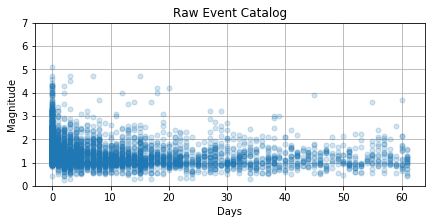

In [48]:
# Load the catalog from HW #1 (provided in your current working directory)
print('The magnitude-time distribution of Loma Prieta aftershocks is shown here:')
data=pd.read_csv('anss_catalog_1900to2018all.txt', sep=' ', delimiter=None, header=None,
                names = ['Year','Month','Day','Hour','Min','Sec','Lat','Lon','Mag'])
EQ_1989 = data[(data.Year>=1989) & (data.Year<1990)]          #get one year of data
fall_eq = EQ_1989[(EQ_1989.Month>9) & (EQ_1989.Month<=12)]    #collect months of Oct, Nov and Dec
LP_eq = fall_eq[(~((fall_eq.Month==10) & (fall_eq.Day<18)))]  #negate events before day (assumes first month is 10)
LP_eq = LP_eq[(~((LP_eq.Month==12) & (LP_eq.Day>18)))]        #negate events after day (assumes last month is 12)
LP_eq.reset_index(drop=True, inplace=True)
year,month,day,hour,minute,sec,lat,lon,mag,days = readAnssCatalog(LP_eq)
days = days[1:] # remove mainshock
mag = mag[1:]

# Plot of magnitude vs. day for entire catalog
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(days,mag,'o',alpha=0.2,markersize=5)
ax.set(xlabel='Days', ylabel='Magnitude',
       title='Raw Event Catalog')
ax.grid()
ax.set_ylim([0,7])
plt.show()

#### Answer

In [54]:
# Hint: the easiest way to find the number of aftershocks per day in a magnitude range is to 
# further refine the LP_eq catalog uisng boolean statements.
#
#

Write you answer here

#### Questions 2.4
The statistics compiled by Reasenberg and Jones also allows for the estimation of the probability of an event larger than the mainshock occurring, or in other words the probability that a given event is in fact a foreshock. Immediately following the Loma Prieta earthquake, within a lapse time of 0.1 day, what was the probability that a larger earthquake might occur?

#### Answer

In [51]:
# write your code here

Write your answer here

#### Questions 2.5
Practically speaking, what was the duration of the Loma Prieta sequence? Explain you answer in terms Omori statistics and the probability of aftershock occurrence with increasing time following the main shock.

#### Answer

In [50]:
# write your code here

Write your answer here

### Exercise 3

As discussed in class paleoseismic trench data at Pallet Creek in southern California reveals the quasi-periodic behavior of large earthquakes on the San Andreas fault. From the very careful mapping of offset stratigraphy in the trench and carbon-14 radiometric dating these large earthquakes have been found to have occurred in 1857, 1812, 1480, 1346, 1100, 1048, 997, 797, 734, 671, 529 (see figure from Sieh, K., Stuiver, M. and Brillinger, D., 1989). These earthquakes include M8 earthquakes on the southern segment of the San Andreas fault, which extends from Parkfield southward through the Big Bend into southern California. Each earthquake may not have been as large as M8, however, given the mapped slip, each event is considered to be M>7. The 1857 earthquake was M8. 

<img src="palletCreek.png">

Using this recurrence data we are going to examine the periodicity, plot the distribution of events in terms of binned interval time, compare the observed distribution with idealized probability density functions, and then use those functions to estimate the conditional probability of occurrence of these events.

#### Question 3.1

Given the time intervals separating the event list given above, compare the fits of a Gaussian and Lognormal probability density model. 


Gaussian:  
$$
pd(u)=\frac{e^{\frac{-(u - Tave)^2}{2 {\sigma}^2}}}{\sigma \sqrt{2 \pi}}
$$


Log-Normal: 
$$
pd(u)=\frac{e^{\frac{-{(ln(u/Tave))}^2}{2 {(\sigma / Tave)}^2}}}{(\frac{\sigma}{Tave}) u  \sqrt{2 \pi}}
$$

The models depend on the mean interval recurrence time ($T_{ave}$), the standard deviation to the mean ($\sigma$), and the random variable ($u$) which in this case represents the interval time.


To do this make a histogram with bins from 1-51, 51-101, 101-151, etc. The center dates of the bins will be 26, 76, 126, etc. Then fit each probability density model. 
Which type of distribution appears to fit the data better?

#### Answer

In [49]:
# hint: matplotlib.pyplot and pandas.DataFrame both have 
#       histogram functions

Write your answer here

### Exercise 4
In this problem we will estimate the probability of occurrence of a magnitude M8 earthquake based on the historic Pallet Creek recurrence data and the best fitting probability density model determined in Exercise 3.  

The probability that an event will occur within a given time window, for example 30-years, is the definite integral of the probability density function computed over that time window: 
$$
P(T_e <= T <= T_e + \Delta T)=\int_{T_e}^{T_e + \Delta T} pd(u)du,
$$

where $\Delta T$ is the length of the forecast window and $T_e$ is the time since the previous event. Note how P varies as a function of elapsed time. For any given forecast window, the value of P is small but is greatest near the mean of the distribution. Note that the Gaussian and lognormal probability density functions defined above are normalized to unit area. 

#### Question 4.1

Estimate the 10-year, 20-year and 30-year probabilities for a repeat of this large Pallet Creek fault segment event using your estimates of $Tave$, $\sigma$, and $T_e=162$ years (time since 1857). Compare these estimates with those obtained assuming the Poison model (as done above).

The first step is to find the probability that the event will occur in the window, $\Delta T$ with the condition that the event did not occur before $T_e$. This effectively reduces the sample space. The result is the following normalization for the conditional probability:

$$
P(T_e <= T <= T_e + \Delta T | T >= T_e) = \frac{\int_{T_e}^{T_e + \Delta T} pd(u)du}{1.0 - \int_{0}^{T_e}pd(u)du}
$$

#### Answer

In [56]:
# *****
# hint: use a for loop over du to compute the integral
#

Write your answer here

#### Question 4.2

Estimate the change in the 30-year probability if the event does not occur next 10 years.

#### Answer

In [57]:
# Write your code here

Write your answer here

#### Question 4.3

Can you identify a weakness of this model?

#### Answer

Write your answer here